# 0. Введение.

Привет! Эта лабораторная работа про то, какие есть способы сбора данных с сайтов. Давай начнём с небольшого введения про то, как её выполнять.

В коде и тексте этой лабораторной работы встречаются блоки двух видов. Первый из них будет в ячейках с кодом и выглядит он так:


```
# TODO
```

Это означает, что тут надо написать одну или несколько строчек кода.

Второй тип блоков выглядит так - <font color='violet'> \# TODO </font>. Он означает, что тут надо написать какие-то свои мысли и выводы. Когда будешь писать, пожалуйста, не меняй цвет текста твоего ответа - это упростит проверку.

В тексте внизу собраны все нужные библиотечки - запускаем её и начинаем выполнение лабораторной работы! :)

In [322]:
from urllib.request import urlopen
from urllib.parse import urlparse, urldefrag, urljoin
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import json

# Часть 1. Работа со статическими страницами при помощи bs4. 3 балла.



В этой части вам не нужно работать с маркетплейсами или сложными крупными онлайн-магазинами, достаточно поиграться с **небольшим нишевым магазинчиком**.

Пример сайта, подходящего под задание:
- Семена овощей - Аэлита https://ailita-shop.ru/


Вам нужно найти ПОХОЖИЙ сайт без динамической подгрузки контента (таких в интернете очень много)

Для формирования представления о магазине достаточно посмотреть на товары одной выбранной категории.

На странице товара **должна содержалась следующая информация, которую вам надо будет получить в рамках задания**:

- Название
- Картинка
- Характеристики (минимум 1)
- Описание

Описание должно быть достаточно большим (больше одного предложения) и содержать информацию о характеристиках товара. Например, как это бывает на алиэкспрессе

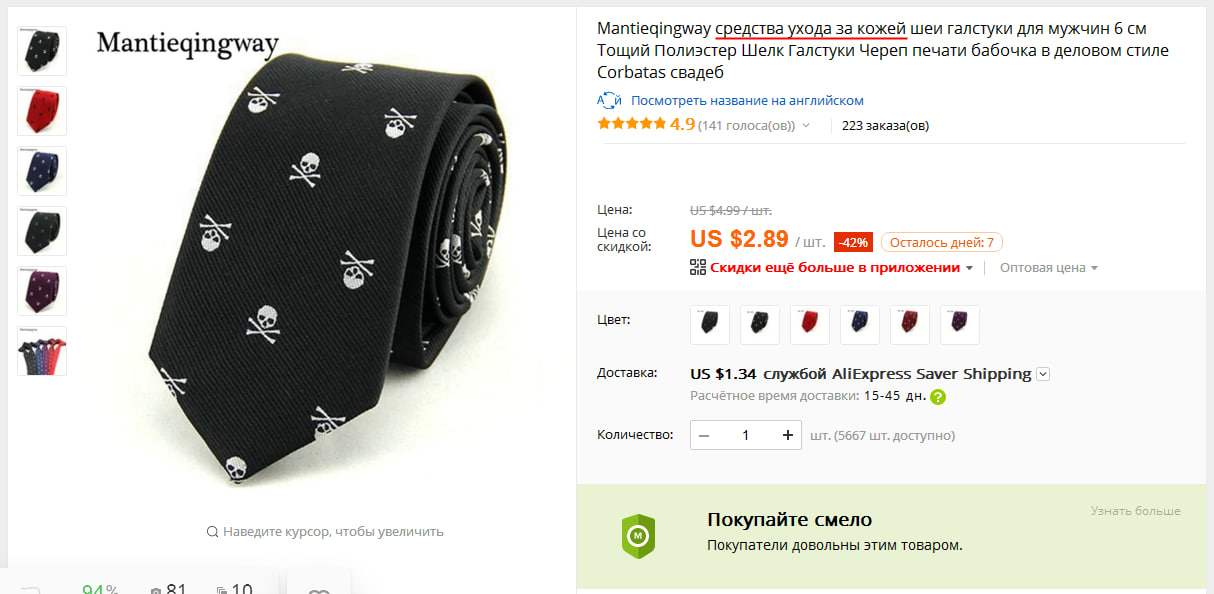

## Исследование

Выберите магазин, который удовлетворяет описанию магазина-конкурента:

<font color='violet'> \# TODO </font>

Выберите категорию товаров и посмотрите на предлагаемые карточки товаров. **Категория должна содержать 20+ карточек, чтобы можно было составить более полное мнение о товарах в магазине.**

In [ ]:
url = 'https://dobryninsky.ru/catalog/torty/'

Откройте ссылку с помощью библиотеки `urllib` и загрузите данные в переменную `html`. Не забудь про кодировку!

In [ ]:
html = urlopen(url).read().decode('utf-8')

In [ ]:
print(html) # проверяем, что страница загрузилась

<!DOCTYPE html>
<html lang="ru" prefix="og: http://ogp.me/ns#">
<head>
    <meta http-equiv="X-UA-Compatible" content="IE=Edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Выбор тортов на любой вкус от кондитерского комбината Добрынинский</title>

    
    <meta name="apple-mobile-web-app-capable" content="on">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <link rel="apple-touch-icon" sizes="180x180" href="/h/build/images/favicon/apple-touch-icon.png">
    <link rel="icon" type="image/png" sizes="32x32" href="/h/build/images/favicon/favicon-32x32.png">
    <link rel="icon" type="image/png" sizes="16x16" href="/h/build/images/favicon/favicon-16x16.png">
    <link rel="manifest" href="/h/build/images/favicon/site.webmanifest">
    <meta name="msapplication-TileColor" content="#da532c">
    <meta name="theme-color" content="#ffffff">
    <meta name="cmsmagazine" content="e75e39b3bd34ca4a5b9f0081af378ef3">

    <link

Распарсьте текстовую информация на странице, используя библиотеку `bs4`



In [ ]:
soup = BeautifulSoup(html, 'lxml')

Найдите все узлы href на странице

In [ ]:
hrefs = soup.find_all('a')

In [ ]:
hrefs

[<a href="/kak-zakazat/">Как заказать</a>,
 <a href="/kak-poluchit/">Как получить</a>,
 <a href="/kak-oplatit/">Как оплатить</a>,
 <a href="/vozvrat-tovara/">Как вернуть</a>,
 <a href="http://vk.com/public75670672" target="_blank">
 <svg class="vk">
 <use xlink:href="/h/build/images/svg-symbols.svg#vk" xmlns:xlink="http://www.w3.org/1999/xlink"></use>
 </svg>
 </a>,
 <a href="https://ok.ru/group/53271470997632" target="_blank">
 <svg class="ok">
 <use xlink:href="/h/build/images/svg-symbols.svg#ok" xmlns:xlink="http://www.w3.org/1999/xlink"></use>
 </svg>
 </a>,
 <a href="https://t.me/dobryninskiy_kk" target="_blank">
 <img alt="Telegram" src="/upload/iblock/e52/e520f34a39760a214f6ab9363c03563a.svg"/>
 </a>,
 <a class="language__img" data-google-lang="ru" title="ru">RU</a>,
 <a class="language__img" data-google-lang="en" title="en">EN</a>,
 <a class="language__img" data-google-lang="ar" title="ar">AR</a>,
 <a class="language__img" data-google-lang="zh-TW" title="zh">ZH</a>,
 <a class="

Сохраните полные адреса сслыкок в список


Подсказка: используйте `urljoin`

In [ ]:
links = [urljoin(url, link.get('href')) for link in hrefs]

In [ ]:
links

['https://dobryninsky.ru/kak-zakazat/',
 'https://dobryninsky.ru/kak-poluchit/',
 'https://dobryninsky.ru/kak-oplatit/',
 'https://dobryninsky.ru/vozvrat-tovara/',
 'http://vk.com/public75670672',
 'https://ok.ru/group/53271470997632',
 'https://t.me/dobryninskiy_kk',
 'https://dobryninsky.ru/catalog/torty/',
 'https://dobryninsky.ru/catalog/torty/',
 'https://dobryninsky.ru/catalog/torty/',
 'https://dobryninsky.ru/catalog/torty/',
 'https://dobryninsky.ru/catalog/torty/#login',
 'https://dobryninsky.ru/catalog/torty/#login',
 'https://dobryninsky.ru/',
 'tel:88005008277',
 'https://dobryninsky.ru/personal',
 'https://dobryninsky.ru/catalog/torty/#feedback',
 'https://dobryninsky.ru/cart/',
 'https://dobryninsky.ru/catalog/actions/',
 'https://dobryninsky.ru/catalog/novinki/',
 'https://dobryninsky.ru/catalog/novyy_god/',
 'https://dobryninsky.ru/catalog/torty/',
 'https://dobryninsky.ru/catalog/torty_delyuks/',
 'https://dobryninsky.ru/catalog/biskvitnye-torty/',
 'https://dobryninsk

Какие ссылки соответствуют карточкам товаров? Выберите все такие ссылки. Для этого напишем функцию фильтрации, которая будет определять, является ли ссылка корректной

In [ ]:
# Добрынинский почему-то не считает чизекейки тортами, поэтому их нужно указывать отдельно
def filter(links, keywords=['https://dobryninsky.ru/product/tort', 'https://dobryninsky.ru/product/chizkeyk-']):
  filtered_links = []
  for link in links:
    for keyword in keywords:
      if keyword in link:
        filtered_links.append(link)
  return filtered_links



In [ ]:
filtered_links = filter(links)
filtered_links

['https://dobryninsky.ru/product/torty-esterkhazi/',
 'https://dobryninsky.ru/product/torty-esterkhazi/',
 'https://dobryninsky.ru/product/torty-tiramisu-de-lyuks/',
 'https://dobryninsky.ru/product/torty-tiramisu-de-lyuks/',
 'https://dobryninsky.ru/product/torty-kievskiy-podarochnyy/',
 'https://dobryninsky.ru/product/torty-kievskiy-podarochnyy/',
 'https://dobryninsky.ru/product/torty-moskva/',
 'https://dobryninsky.ru/product/torty-moskva/',
 'https://dobryninsky.ru/product/torty-dobryninskiy/',
 'https://dobryninsky.ru/product/torty-dobryninskiy/',
 'https://dobryninsky.ru/product/torty-napoleon/',
 'https://dobryninsky.ru/product/torty-napoleon/',
 'https://dobryninsky.ru/product/torty-orekhovyy-po-korolevski/',
 'https://dobryninsky.ru/product/torty-orekhovyy-po-korolevski/',
 'https://dobryninsky.ru/product/torty-praga/',
 'https://dobryninsky.ru/product/torty-praga/',
 'https://dobryninsky.ru/product/torty-vechernyaya-praga/',
 'https://dobryninsky.ru/product/torty-vechernyaya

 На странице могло быть несколько ссылок, ведущих на одну и ту же карточку товара. Избавьтесь от дубликатов в списке ссылок

In [ ]:
filtered_links = set(filtered_links)
filtered_links

{'https://dobryninsky.ru/product/chizkeyk-de-lyuks/',
 'https://dobryninsky.ru/product/torty-assorti-4-vkusa/',
 'https://dobryninsky.ru/product/torty-belye-nochi/',
 'https://dobryninsky.ru/product/torty-bento-klubnika/',
 'https://dobryninsky.ru/product/torty-bento-lavanda/',
 'https://dobryninsky.ru/product/torty-chudo-vishnya/',
 'https://dobryninsky.ru/product/torty-den-rozhdeniya/',
 'https://dobryninsky.ru/product/torty-desert/',
 'https://dobryninsky.ru/product/torty-detskiy-yezhik/',
 'https://dobryninsky.ru/product/torty-detstvo/',
 'https://dobryninsky.ru/product/torty-dobryninskaya-fistashka-de-lyuks/',
 'https://dobryninsky.ru/product/torty-dobryninskaya-ptichka/',
 'https://dobryninsky.ru/product/torty-dobryninskaya-skazka/',
 'https://dobryninsky.ru/product/torty-dobryninskiy-s-chernoy-smorodinoy/',
 'https://dobryninsky.ru/product/torty-dobryninskiy/',
 'https://dobryninsky.ru/product/torty-eko-lakomka-de-lyuks-novogodnyaya/',
 'https://dobryninsky.ru/product/torty-eko-

Сколько получилось ссылок?

In [ ]:
len(filtered_links) # Это победа) тк на странице их тоже 60

60

In [ ]:
# У меня на сайте несколько страниц, попробуем скачать все страницы, для этого напишем доп функцию

def links_from_many_pages(adress = 'https://dobryninsky.ru/catalog/torty/?PAGEN_2=', num_of_pages = 2):
  filtered_links = []
  for page_num in range(1, num_of_pages + 1):
    html = urlopen(adress + str(page_num)).read().decode('utf-8')
    soup = BeautifulSoup(html, 'lxml')
    hrefs = soup.find_all('a')
    links = [urljoin(url, link.get('href')) for link in hrefs]
    filtered_links = filtered_links + filter(links)
  filtered_links = list(set(filtered_links))
  return filtered_links

In [ ]:
filtered_links = links_from_many_pages()
len(filtered_links) # Это тоже победа)

104

Теперь, когда у нас есть ссылки на товары, давайте проанализируем, что этот магазин продает. Откройте страницу товара и посмотрите, какая информация там представлена и какую информацию вы хотите сохранить. **Обязательные** колонки:

- Название
- Картинка
- Характеристики (минимум 1) - для одежды это может быть ткань, из которой  она сшита, для семян овощей - срок созревания и.т.д.
- Описание

Можно **(и даже стоит)** добавить больше колонок, если получается выгрузить такую информацию.

In [ ]:
columns = ['Title', 'Picture', 'Price', 'Weight','With_Nuts' ,'Description']

Напишите функцию, которая принимает ссылку на страницу и возвращает все необходимые признаки. Для этого давайте поймем, как работать сначала с одной ссылкой

Выберите первую ссылку из списка

In [ ]:
first_link = filtered_links[0]

Распечатайте ее

In [ ]:
first_link

'https://dobryninsky.ru/product/torty-idilliya/'

Используя библиотеку `requests` загрузите данные по сслыке и распартье их, как вы это делали ранее

In [ ]:
response = requests.get(first_link)
soup = BeautifulSoup(response.text, 'lxml')

Посмотрите на полученные данные. В каком узле находится название товара? Сохраните этот узел и достаньте название товара

In [ ]:
title = soup.find('h1', class_='product-title')
print(title.text)

Идиллия


Проделайте аналогичные шаги, чтобы получить информацию для оставшихся колонок

In [ ]:
price = float(soup.find('div', class_='product-info__price').find('b').get_text())
weights = soup.find('div', class_='product-info__weight').find('ul').find_all('li')

weights_of_cakes = []
for weight in weights:
    extracted_text = weight.get_text().strip().replace(' кг', '').replace(',', '.') # нужно тк в html сть строчка <li ... - кг</li> и мы дальше её исключаем
    if extracted_text != '-':
      weights_of_cakes.append(float(extracted_text))
weights_of_cakes

a_style = soup.find('a', class_='product-slider-img js-open-slider').get('style') # оказалось, что у меня ссылка на картинку лежит так, что её достать не очень просто, я использую регулярные выражения
link_to_img =  "https://dobryninsky.ru" + re.findall(r'url\("([^"]+)"\)', a_style)[0]
print(link_to_img)

https://dobryninsky.ru/upload/iblock/f0c/f0ca0ee446fbe808444725d5a3165a70.jpg


Достаньте описание товара

In [ ]:
description = soup.find('div', class_='product-description__body').get_text(strip=True)

In [ ]:
description

'Слои нежного бисквита покрыты слоем суфле. Украшен торт сливочным кремом, свежими фруктами, желе и взбитыми сливками. Диаметр торта: 30 см. Количество ярусов в торте уточняйте у оператора интернет-магазина.В оформлении изделия возможны незначительные изменения в зависимости от его массы!На торте Вы можете заказать поздравительную надпись, которая наносится цветным сливочным кремом на ровной поверхности торта или на площадке из шоколада. Текст и цвет надписи сообщите оператору при подтверждении заказа или напишите в комментарии к онлайн заказу.'

Если сайт соответсвует требованиям, то тут должно содержаться много полезной информации, которая не попала в карточку товара, но может быть интересна при исследовании. Выберите какую-нибудь часто встречающуюся в описаниях товаров характеристику и попробуйте вытащить информацию о ней с помощью регулярного выржения. Например, для плодовых культур такой харатеристикой может быть срок созревания первых плодов

Характеристика: <font color='violet'> Наличие орехов в торте. Это важно для определения того, подойдёт ли данный тортик людям с аллергией на орехи <br>
Ещё я использовал регулярные выражения, чтобы достать ссылку на картинку ранее </font>

Используйте библиотеку `re` и напишите регулярное выражение для выделения данной харатеристики. Опишите, почему выбрано именно такое регулярное выражение и в чем его смысл:

<font color='violet'> Мы ищем в описании любые слова, где встрчается корень 'орех', также мы должны учитывать прилагательные с дефисом, например 'шоколадно-ореховый' <br>
\w* - сколько угодно букв до тире (цифр в словах нет, так что off-targeta не будет) <br>
-? - в слове мб тире, притом только одно<br>
\w* - сколько угодно букв после тире<br>
 </font>

In [ ]:
def Is_With_Nuts(description, pattern = r'\w*-?орех\w*'):
  matches = re.findall(pattern, description, flags=re.IGNORECASE)
  if matches:
    return True
  else:
    return False

Оформите полученные данные в датафрейм при помощи `Pandas`. Выведите записи.

In [ ]:
# columns = ['Title', 'Picture', 'Price', 'Weight','With_Nuts' ,'Description']
data = []
for link in filtered_links:
  weights = soup.find('div', class_='product-info__weight').find('ul').find_all('li')
  weights_of_cakes = []
  for weight in weights:
      extracted_text = weight.get_text().strip().replace(' кг', '').replace(',', '.') # нужно тк в html сть строчка <li ... - кг</li> и мы дальше её исключаем
      if extracted_text != '-':
        weights_of_cakes.append(float(extracted_text))

  for weight_of_cake in weights_of_cakes:
    response = requests.get(link)
    soup = BeautifulSoup(response.text, 'lxml')

    title = soup.find('h1', class_='product-title').text

    a_style = soup.find('a', class_='product-slider-img js-open-slider').get('style') # оказалось, что у меня ссылка на картинку лежит так, что её достать не очень просто, я использую регулярные выражения
    link_to_img =  "https://dobryninsky.ru" + re.findall(r'url\("([^"]+)"\)', a_style)[0]

# У некоторых тортов есть несколько вариаций с разными массами, далее я реализовал, чтобы мы из записывали, но из-за того, что у нас отключён js цена онлайн не обновляется
# Так что в df о всеми тортиками только для первой массы будет цена, а для остальных None

    if (weight_of_cake == weights_of_cakes[0]):
      price = float(soup.find('div', class_='product-info__price').find('b').get_text())
    else:
      price = None

    description = soup.find('div', class_='product-description__body').get_text(strip=True)

    with_nuts = Is_With_Nuts(description)

    row_in_table = [title, link_to_img, price, weight_of_cake, with_nuts, description]

    data.append(row_in_table)

In [ ]:
data

[['Идиллия',
  'https://dobryninsky.ru/upload/iblock/f0c/f0ca0ee446fbe808444725d5a3165a70.jpg',
  3959.9,
  0.92,
  False,
  'Слои нежного бисквита покрыты слоем суфле. Украшен торт сливочным кремом, свежими фруктами, желе и взбитыми сливками. Диаметр торта: 30 см. Количество ярусов в торте уточняйте у оператора интернет-магазина.В оформлении изделия возможны незначительные изменения в зависимости от его массы!На торте Вы можете заказать поздравительную надпись, которая наносится цветным сливочным кремом на ровной поверхности торта или на площадке из шоколада. Текст и цвет надписи сообщите оператору при подтверждении заказа или напишите в комментарии к онлайн заказу.'],
 ['Эльфи',
  'https://dobryninsky.ru/upload/iblock/193/19374ef13b1e41ade2d44e0c1014bcdf.jpg',
  2886.45,
  2.0,
  True,
  'Классический бисквит с сахарным сиропом и нежным сливочным кремом с вареной сгущенкой, отделан воздушным безе, сахарным печеньем, сухофруктами, орехами и цукатами.'],
 ['Эльфи',
  'https://dobrynins

In [ ]:
df = pd.DataFrame(data, columns=columns)

In [137]:
df

Title  \
0                               Идиллия   
1                                 Эльфи   
2                                 Эльфи   
3                Мусс Три вкуса Де-Люкс   
4                       Шарм (заказной)   
..                                  ...   
153                             Восторг   
154                             Восторг   
155                        Рог изобилия   
156  Детский "Машинка", Детский "Домик"   
157                           Малиновый   

                                               Picture    Price  Weight  \
0    https://dobryninsky.ru/upload/iblock/f0c/f0ca0...  3959.90    0.92   
1    https://dobryninsky.ru/upload/iblock/193/19374...  2886.45    2.00   
2    https://dobryninsky.ru/upload/iblock/193/19374...      NaN    3.00   
3    https://dobryninsky.ru/upload/iblock/1bd/1bd35...  3199.90    2.00   
4    https://dobryninsky.ru/upload/iblock/cdb/cdbda...  2829.90    0.92   
..                                                 ...      ...     ...   
153  https://dobryninsky.ru/upload/iblock/7d7/7d756...  1229.90    1.00   
154  https://dobryninsky.ru/upload/iblock/7d7/7d756...      NaN    2.00   
155  https://dobryninsky.ru/upload/iblock/753/753b0...  4050.00    0.90   
156  https://dobryninsky.ru/upload/iblock/8a5/8a568...  4869.90    3.00   
157  https://dobryninsky.ru/upload/iblock/3cb/3cb49...  1625.90    3.00   

     With_Nuts                                        Description  
0        False  Слои нежного бисквита покрыты слоем суфле. Укр...  
1         True  Классический бисквит с сахарным сиропом и нежн...  
2         True  Классический бисквит с сахарным сиропом и нежн...  
3        False  Пропитанные сиропом слои нежного шоколадного б...  
4         True  Слои нежного шоколадного бисквита и воздушно-о...  
..         ...                                                ...  
153      False  Слои нежного бисквита, соединённые воздушным с...  
154      False  Слои нежного бисквита, соединённые воздушным с...  
155      False  Пропитанные сиропом слои нежного бисквита прос...  
156      False  Пропитанные сиропом слои воздушного бисквита п...  
157      False  Слои воздушных слоеных коржей и нежного бискви...  

[158 rows x 6 columns]

In [139]:
print(f"Средняя цена за торт {df['Price'].mean():.2f} рублей")
avg_price_for_kg = df['Price'] / df['Weight']
avg_price_for_kg = avg_price_for_kg.dropna().mean()
print(f"Средняя цена за кг {avg_price_for_kg:.2f}")
avg_price_with_nuts = df[df['With_Nuts']]['Price'] / df[df['With_Nuts']]['Weight']
avg_price_with_nuts = avg_price_with_nuts.dropna().mean()

avg_price_without_nuts = df[df['With_Nuts'] == False]['Price'] / df[df['With_Nuts'] == False]['Weight']
avg_price_without_nuts = avg_price_without_nuts.dropna().mean()

print(f"Средняя цена за кг для тортов с орехами {avg_price_with_nuts:.2f}")
print(f"Средняя цена за кг для тортов без орехов {avg_price_without_nuts:.2f}")

f = df.dropna()
num_with_nuts = f['With_Nuts'].value_counts().get(True, 0)
num_without_nuts = f['With_Nuts'].value_counts().get(False, 0)

print(f"Количество тортов с орехами: {num_with_nuts}")
print(f"Количество тортов без орехов: {num_without_nuts}")



Средняя цена за торт 1975.32 рублей
Средняя цена за кг 2274.07
Средняя цена за кг для тортов с орехами 1852.33
Средняя цена за кг для тортов без орехов 2374.48
Количество тортов с орехами: 20
Количество тортов без орехов: 84


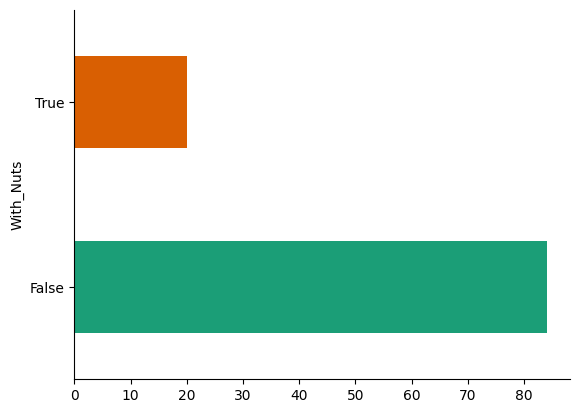

In [131]:
from matplotlib import pyplot as plt
import seaborn as sns
df.dropna().groupby('With_Nuts').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

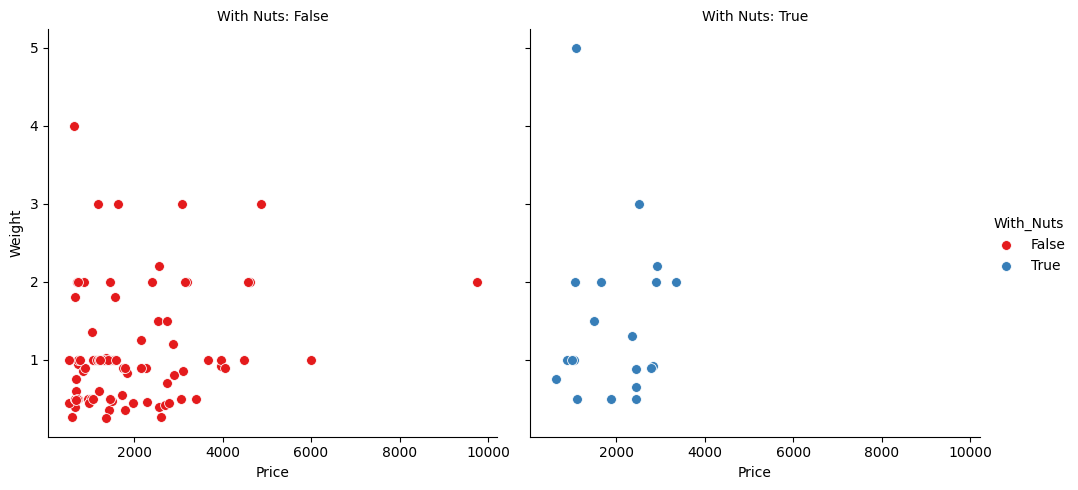

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

f = df.dropna()

g = sns.FacetGrid(f, col='With_Nuts', hue='With_Nuts', palette='Set1', height=5)

# Строим графики
g.map(sns.scatterplot, 'Price', 'Weight', s=50)  # s - размер точек

# Настраиваем графики
g.set_axis_labels('Price', 'Weight')
g.set_titles(col_template='With Nuts: {col_name}')
g.add_legend()

# Показываем графики
plt.show()

Посмотрите на колонку, которая получилась после парсинга описания с помощью регулярных выражений и **ответьте на вопросы**:
1. Сколько получилось заполненных ячеек? Сколько это составляет процентов от общего количества?
2. Во всех ли ячейках адекватная информация?
3. Если что-то некорректно заполнилось, то почему такое произошло?

In [113]:
filled_cells = df.count().sum()
percentage_filled = (filled_cells / df.size) * 100
print(f"Заполнено ячеек {filled_cells}")
print (f"Процент заполнения {percentage_filled:.2f}%")
for column in df.columns:
    print()
    print(f"Столбец: {column}")
    print(f"Тип данных: {df[column].dtype}")
    print(f"Пропуски: {df[column].isnull().sum()} из {len(df)}")

Заполнено ячеек 894
Процент заполнения 94.30%

Столбец: Title
Тип данных: object
Пропуски: 0 из 158

Столбец: Picture
Тип данных: object
Пропуски: 0 из 158

Столбец: Price
Тип данных: float64
Пропуски: 54 из 158

Столбец: Weight
Тип данных: float64
Пропуски: 0 из 158

Столбец: With_Nuts
Тип данных: bool
Пропуски: 0 из 158

Столбец: Description
Тип данных: object
Пропуски: 0 из 158


<font color='violet'> Заполненных ячеек 894, это 94 процента <br>
Пропуски есть только в столбце price, аони возникли тк мы так и хотели. Всё остальное заполнилось нормально <br>
Оказалось, что нет зависимости между ценой, весом, наличием орехов, также на грфаике просматривается сегмент маленьких бенто тортиков </font>

# Часть 2. Изучение ограничений парсинга. 1 балл.

В рамках изучения конкурентов мы также узнали, что у них есть магазины **на Ozon**. Преисполнившись уверенностью после легкого парсинга сайта-магазина конкурентов, мы решили, что теперь мы готовы парсить большие маркетплейсы. В следующих ячейках попробуй проделать те же шаги, которые делались в части 1 этой лабораторной работы.

Запишем ссылку на товар компании-конкурента. Попробуем обратиться к ней через response; после этого посмотрим на ответ. Если в ответе есть русские символы, то проверим кодировку - чтобы они корректно отображались, строка должна быть в utf-8. Для этого могут помочь методы `encode` и `decode`.

Примеры подходящих ссылок согласно примерам из части 1 этой лабораторной:

- Семена кабачков 'https://www.ozon.ru/product/semena-kabachok-babe-schaste-2-gr-semena-altaya-864807018/'

In [147]:
url_ozon = 'https://www.ozon.ru/product/bento-tort-mishka-kosmonavt-biskvitnyy-so-smetannym-kremom-200-g-ot-shef-konditera-ozon-1170664459'
response = requests.get(url_ozon)
response.encoding = 'utf-8'

Выведи текст ответа

In [148]:
print(response.text)



    <!DOCTYPE html><html lang="ru"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1"><meta name="robots" content="noindex, nofollow"><link rel="stylesheet" href="https://cdn1.ozone.ru/s3/abt-complaints/static/v1/common.css"><style>.con {overflow: auto;margin: auto;}  .mc {max-width: 420px;padding: 0 16px;overflow: auto}  .bc {padding-top: 32px}  h1 {margin: 24px 0 8px 0}  .tc {padding: 8px 0}  ul {margin: 8px 0 8px 0;padding-left: 24px}  .h {font-size: 12px;line-height: 16px;color: rgba(0, 26, 52, .6)}  .rb {margin-bottom: 16px}  .sb {background-color: transparent;color: var(--ctrlPrimary);padding: 6px}  .sb:hover {color: var(--hoverPrimary)}  .im {margin-left: -16px;width: 144px}  @media (max-width: 375px) {  .im {width: 104px}  h1 {margin-top: 20px;font-size: 20px;line-height: 24px}  .bc {padding-bottom: 50px}  .tc {color: rgba(0, 26, 52, .6)}  }</style><title>Доступ ограничен<

Какую страницу вывело? Та ли эта страница, которая доступна по ссылке в браузере?

Изучи в интернете, что привело к такому результату и какие есть способы обхода этой ошибки. **Результаты опиши в выводе к этой части.**

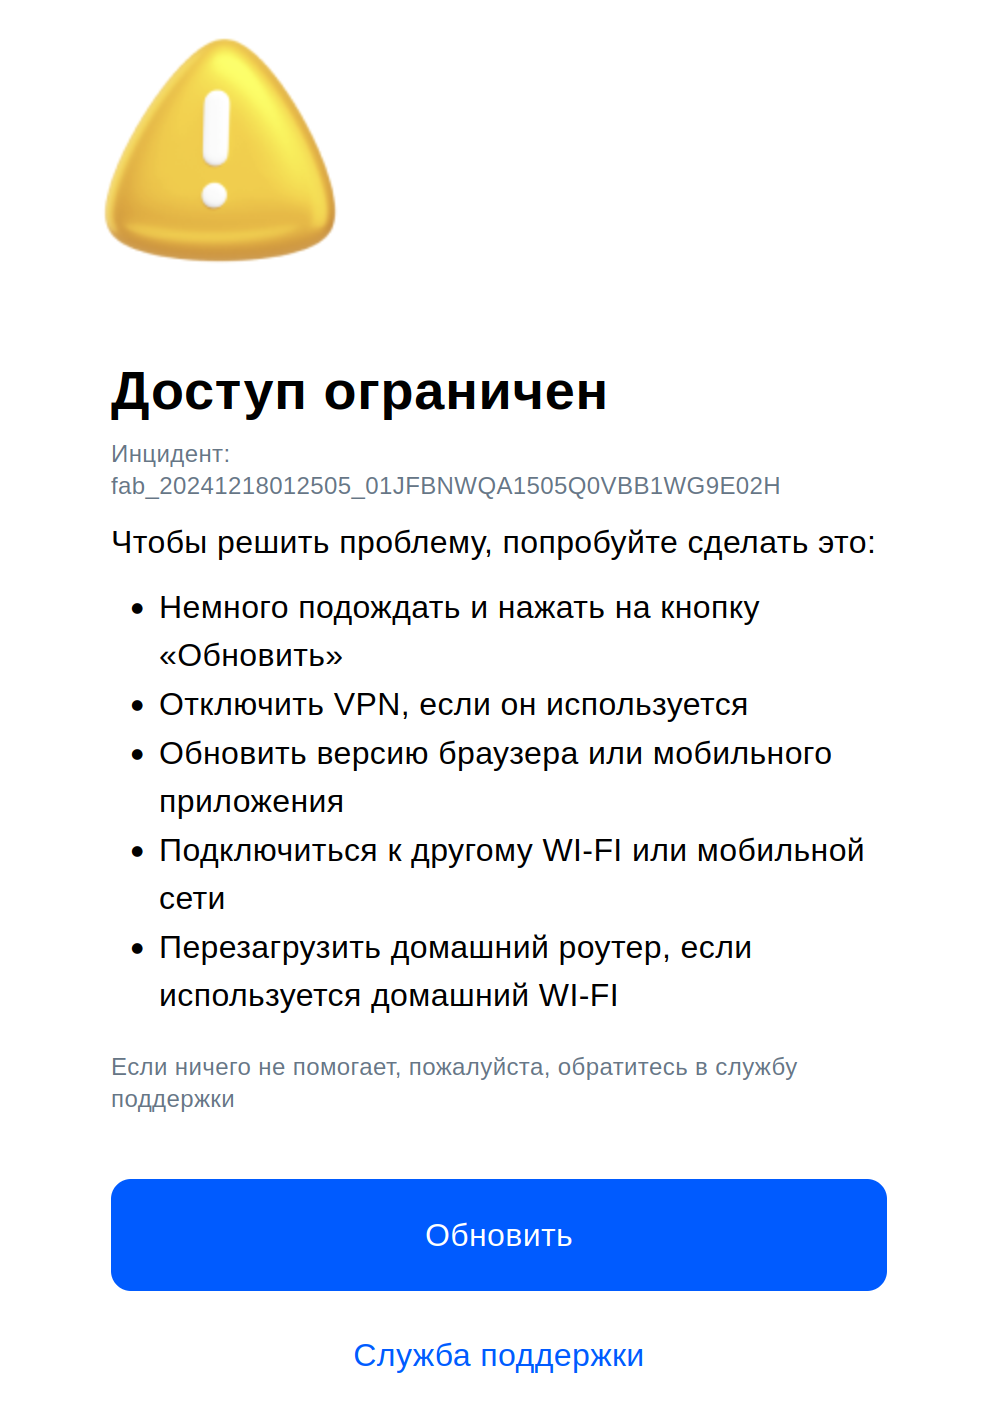

Выводы: <font color='violet'> Мы получили страницу, на которой указано, что нам ограничен доступ. Ozon использует механизм защиты от автоматических запросов. Это можно подтвердить, если зайти на https://www.ozon.ru/robots.txt, там можно увидеть, что нашему user-agnet нельзя обращаться к интересным нам страницам. Сайт может смотреть на заголовки и по ним определять автоматизированный доступ.
Можно попытаться поменять их, чтобы сайт нас пропустил. Можно использовать selenium.

 </font>

# Часть 3. Парсинг динамического контента при помощи регулярных выражений. 1 балла.

Теперь, когда мы поняли, что ребята продают, важно понять как они это продают. У веб-магазинов часто есть странички в соцсетях для продвижения бренда. **Главная задача в этой части работы - проанализировать контент.** Для этого будем использовать ютуб :)

Найдите ютуб-канал вашего интернет-магазина. Если такого нет, то подойдет любой канал со схожей тематикой

Название канала: <font color='violet'> У Палыча ТМ </font>

Сохраните ссылку на страничку с роликами на этом канале

In [8]:
from urllib.request import urlopen
from urllib.parse import urlparse, urldefrag, urljoin
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import json

In [9]:
url = 'https://www.youtube.com/@%D0%A3%D0%9F%D0%B0%D0%BB%D1%8B%D1%87%D0%B0%D0%A2%D0%9C/videos'

Распарсьте страничку с помощью `bs4` и выведите список видео этого канала


In [39]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Для парсинга можно использовать различные подходы

Используя знания о том, что `html` документ - это дерево, попробуйте достать названия видео, как вы извлекали характеристики товаров в предыдущей части. Здесь постарайтесь не использовать регулярные выражения или поясните, почему не получается извлечь информацию без них

In [40]:
# Скачав файл и выполнив поиск по навзаниям первых видео, видим, что все они находятся  в json файле
# Нам нужно достать этот файл, декодировать и достать из него названия видео
scripts = soup.find_all('script')
data_scripts = []
for script in scripts:
    script_text = script.string
    if script_text and 'var ytInitialData' in script_text:  # Проверяем наличие ytInitialData
        data_scripts.append(script_text)

print(data_scripts[0])

var ytInitialData = {"responseContext":{"serviceTrackingParams":[{"service":"GFEEDBACK","params":[{"key":"route","value":"channel.videos"},{"key":"is_owner","value":"false"},{"key":"is_alc_surface","value":"false"},{"key":"browse_id","value":"UCdT60Kyjl1PrieBZaqeucxw"},{"key":"browse_id_prefix","value":""},{"key":"logged_in","value":"0"},{"key":"e","value":"23804281,23986025,24004644,24077241,24108448,24166867,24181174,24241378,24439361,24453989,24459436,24548629,24566687,24699899,39325854,39326986,39327052,39327561,39327846,39327855,39327900,39328144,39328173,39328205,39328255,51009781,51010235,51017346,51020570,51025415,51050361,51053689,51063643,51072748,51091058,51095478,51098299,51111738,51115184,51124104,51141472,51145218,51151423,51152050,51157411,51160545,51169118,51176511,51178982,51183910,51184990,51194137,51204329,51208678,51217504,51222382,51222973,51227037,51228850,51230478,51236019,51237842,51239093,51241028,51242448,51243940,51248255,51248734,51255676,51255743,51256074,5

In [41]:
# чтобы достать файл я пользуюйсь знанием о том, что текст в нужном мне теге начинается с 'var ytInitialData'
# и о удача! такой тэг только один
scripts = soup.find_all('script')
suitable_scripts = []
for script in scripts:
    script_text = script.string
    if script_text and 'var ytInitialData' in script_text:
        suitable_scripts.append(script_text)

In [42]:
json_in_str = suitable_scripts[0].string
# Нам нужен только json файл без 'var ytInitialData' и заключительной ';'поэтому мы обрезаем по первой и последней фигруной скобочке
json_in_str = json_in_str[json_in_str.find('{'):json_in_str.rfind('}') + 1]
# А дальше развлекаемся с json
decoder = json.JSONDecoder()
decoded_json = decoder.raw_decode(json_in_str)[0]

contents = decoded_json['contents']['twoColumnBrowseResultsRenderer']['tabs'][1]['tabRenderer']['content']['richGridRenderer']['contents']

titles = []

for item in contents:
    try:
        title = item['richItemRenderer']['content']['videoRenderer']['title']['runs'][0]['text']
        titles.append(title)
    except (KeyError, IndexError):
        continue

titles


['Блинчики и оладушки за 15 минут с готовым тестом от Палыча к Масленице!',
 'Блинчики и оладушки за 15 минут!',
 'Уникальный реутовский мастер-кондитер Сергей Логоненко',
 'Торты от Палыча — Сладкий Зоопарк. Пятачок. Как это сделано?',
 'Торты от Палыча — Лесная поляна. Как это сделано?',
 'Кокосовое масло вместо маргарина!',
 'Паста с белыми грибами, томатами, Пармезаном и грибным соусом. Видео рецепт от шеф-повара У Палыча',
 'Яичная паста с индейкой, овощами и соусом с беконом по-пармски. Домашний рецепт от шеф-повара',
 'Паста с чернилами каракатицы и соусом из морепродуктов. Вкусные рецепты от шеф-повара "У Палыча"',
 'Вкусный рецепт пасты с томатами черри, рукколой и моцареллой под соусом Песто. Рецепты  "У Палыча"',
 'Вкусный рецепт шпинатной пасты с мясным соусом в мексиканском стиле от шеф-повара "У Палыча"',
 'Видео рецепт Айс-Трайфл с мороженым и лакомствами от шеф-повара "У Палыча"',
 'Готовим пиццу! Мастер-класс от шеф-повара У Палыча Александра Муравлёва',
 'Сибирский пи

Используя регулярные вырежения извлеките названия видео из целого `html` документа

In [50]:
pattern = r'"title":\{"runs":\[\{"text":"(.*?)"\}\]'
titles = re.findall(pattern,response.text)
titles = [title.replace('\\', '') for title in titles]

to_remove = [
    'Keyboard shortcuts',
    'Playback',
    'General',
    'Subtitles and closed captions',
    'Spherical Videos'
]

for item in to_remove:
    if item in titles:
        titles.remove(item)

titles

['Блинчики и оладушки за 15 минут с готовым тестом от Палыча к Масленице!',
 'Блинчики и оладушки за 15 минут!',
 'Уникальный реутовский мастер-кондитер Сергей Логоненко',
 'Торты от Палыча — Сладкий Зоопарк. Пятачок. Как это сделано?',
 'Торты от Палыча — Лесная поляна. Как это сделано?',
 'Кокосовое масло вместо маргарина!',
 'Паста с белыми грибами, томатами, Пармезаном и грибным соусом. Видео рецепт от шеф-повара У Палыча',
 'Яичная паста с индейкой, овощами и соусом с беконом по-пармски. Домашний рецепт от шеф-повара',
 'Паста с чернилами каракатицы и соусом из морепродуктов. Вкусные рецепты от шеф-повара "У Палыча"',
 'Вкусный рецепт пасты с томатами черри, рукколой и моцареллой под соусом Песто. Рецепты  "У Палыча"',
 'Вкусный рецепт шпинатной пасты с мясным соусом в мексиканском стиле от шеф-повара "У Палыча"',
 'Видео рецепт Айс-Трайфл с мороженым и лакомствами от шеф-повара "У Палыча"',
 'Готовим пиццу! Мастер-класс от шеф-повара У Палыча Александра Муравлёва',
 'Сибирский пи

Напишите выводы, отвечая на следующие вопросы

1. Какой из рассмотренных методов в данной ситуации подходит лучше и почему?
2. Получилось ли у вас загрузить все видео с канала за один запрос? Поясните полученные результаты
3. Когда стоит использовать регулярные выражения, а когда хождение по дереву с помощью `bs4`? Приведите примеры
4. С какими проблемами вы столкнулись во время работы и почему они возникли?

<font color='violet'>
1. Регулярные выражения больше подходят тк не нужно самому сначала искать json, потом разбираться в его структуре, потом вытаскивать его, а потом ещё и декодировать. Регулряные выражения просто проще. Но при этом, они также и устройчивее, если немного опменять структуру json, то всё поламается. А регулярное выражение продолжит работатью И даже если нет, то его замена будет занимать мало времени.
2. Нет не получилось, потому что мы загрузили только то, что выдаётся при первом запросе. Далее при прокрутке подключалась бы динамическая подгрузка, но у нас отключён js, так что мы это не можем сделать
3. При огромном кол-ве запрсов или большом размере текста при известной структуре я бы использовал bs4, потому что мы точнее его настраиваем, чем регулярные выражения, поэтому будет меньше offtarget-ов.
Но если у нас много классов или id куда нужно заходить (или мы их не знаем), то будет долго писать код с bs4, поэтому быстрее и удобнее будут регулярные выражения
4. Спрятанный json + много времени ушло на понимание того, какая у него структура, а это нужно было для декодирования. При использование регулярных выражений словил несколько off-target-ов
 </font>

# Часть 4. Парсинг динамическго контента при помощи selenium. 2 балла.

Немного магии из интеренета, чтобы другая магия заработала

In [77]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Fetched 384 kB in 2s (235 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
52 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as

In [150]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium.webdriver.common.by import By
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/131/chromedriver'

In [124]:
# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [117]:
driver.get(url)

Используя библиотеку `BY` найдите названия видео

In [102]:
titles = []
for title in driver.find_elements(By.CSS_SELECTOR, '#video-title'):
    titles.append(title.text)

titles

['Блинчики и оладушки за 15 минут с готовым тестом от Палыча к Масленице!',
 'Блинчики и оладушки за 15 минут!',
 'Уникальный реутовский мастер-кондитер Сергей Логоненко',
 'Торты от Палыча — Сладкий Зоопарк. Пятачок. Как это сделано?',
 'Торты от Палыча — Лесная поляна. Как это сделано?',
 'Кокосовое масло вместо маргарина!',
 'Паста с белыми грибами, томатами, Пармезаном и грибным соусом. Видео рецепт от шеф-повара У Палыча',
 'Яичная паста с индейкой, овощами и соусом с беконом по-пармски. Домашний рецепт от шеф-повара',
 'Паста с чернилами каракатицы и соусом из морепродуктов. Вкусные рецепты от шеф-повара "У Палыча"',
 'Вкусный рецепт пасты с томатами черри, рукколой и моцареллой под соусом Песто. Рецепты "У Палыча"',
 'Вкусный рецепт шпинатной пасты с мясным соусом в мексиканском стиле от шеф-повара "У Палыча"',
 'Видео рецепт Айс-Трайфл с мороженым и лакомствами от шеф-повара "У Палыча"',
 'Готовим пиццу! Мастер-класс от шеф-повара У Палыча Александра Муравлёва',
 'Сибирский пир

Получилось ли загрузить все видео? Почему?

<font color='violet'> Не получилось. Видео начнут динамически подгружаться, только если мы доскроллим до них </font>

Используя методы `selenium` сделайте так, чтобы прогрузилась вся страничка с видео канала и соберите названия видео

In [153]:
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo({ top: document.documentElement.scrollHeight, behavior: 'smooth' });")
    # без smooth не работает, что было открытием для меня, хотя теперь это стало очевидно
    time.sleep(2)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

titles = []
for title in driver.find_elements(By.CSS_SELECTOR, '#video-title'):
    titles.append(title.text)

titles

['Блинчики и оладушки за 15 минут с готовым тестом от Палыча к Масленице!',
 'Блинчики и оладушки за 15 минут!',
 'Уникальный реутовский мастер-кондитер Сергей Логоненко',
 'Торты от Палыча — Сладкий Зоопарк. Пятачок. Как это сделано?',
 'Торты от Палыча — Лесная поляна. Как это сделано?',
 'Кокосовое масло вместо маргарина!',
 'Паста с белыми грибами, томатами, Пармезаном и грибным соусом. Видео рецепт от шеф-повара У Палыча',
 'Яичная паста с индейкой, овощами и соусом с беконом по-пармски. Домашний рецепт от шеф-повара',
 'Паста с чернилами каракатицы и соусом из морепродуктов. Вкусные рецепты от шеф-повара "У Палыча"',
 'Вкусный рецепт пасты с томатами черри, рукколой и моцареллой под соусом Песто. Рецепты "У Палыча"',
 'Вкусный рецепт шпинатной пасты с мясным соусом в мексиканском стиле от шеф-повара "У Палыча"',
 'Видео рецепт Айс-Трайфл с мороженым и лакомствами от шеф-повара "У Палыча"',
 'Готовим пиццу! Мастер-класс от шеф-повара У Палыча Александра Муравлёва',
 'Сибирский пир

Какая еще информация может быть полезна при анализе конкурентов? Попробуйте достать эту информацию с канала с помощью библиотеки `selenium` и поясните, почему вам нужны именно эти данные:

<font color='violet'> Прокликаем на каждое видео и узнаем, сколько у него просмотров, а дале поймём какие видео больше всего залетают.
Для этого нужно нажимать кнопку more, инач не полная информация будет.</font>


 Прежде чем приступить к заданию предложите другие методы получения этих данных и подумайте, почему вам необходимо использовать именно `selenium`:


<font color='violet'> Мы можем сделать это и статическими методами, но тогда мы проанализируем не все видео, а самые популярные видео на моём канале были давно, до них нужно долистать, а для этого нужен selenium </font>

Теперь, когда вы понимаете, что и зачем вы будете делать, можно приступать. Напишите необходимый код

In [165]:
driver.get(url)
while True:
    driver.execute_script("window.scrollTo({ top: document.documentElement.scrollHeight, behavior: 'smooth' });")
    # без smooth не работает, что было открытием для меня, хотя теперь это стало очевидно
    time.sleep(2)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
print(driver.current_url)
video_elements = driver.find_elements(By.CSS_SELECTOR, "a#video-title-link")
dict_title_link = {}
all_video_data = []
for video in video_elements:
    title = video.get_attribute("title")
    link = video.get_attribute("href")
    dict_title_link[title] = link
for title, link in dict_title_link.items():
  print(link)
  driver.get(link)
  time.sleep(5)
  button = driver.find_elements(By.CSS_SELECTOR, "tp-yt-paper-button#expand")
  button[1].click()
  views = driver.find_element(By.CSS_SELECTOR, "yt-formatted-string#info span.style-scope.yt-formatted-string.bold")
  all_video_data.append([title, link, int(views.text.replace(' views', '').replace(',', ''))])

https://www.youtube.com/@%D0%A3%D0%9F%D0%B0%D0%BB%D1%8B%D1%87%D0%B0%D0%A2%D0%9C/videos
https://www.youtube.com/watch?v=ZRORLZk0cnI
https://www.youtube.com/watch?v=yOy0aUOsAps
https://www.youtube.com/watch?v=mdhANt1Yn9I
https://www.youtube.com/watch?v=W45fBF2984w
https://www.youtube.com/watch?v=uWPJ4IePApw
https://www.youtube.com/watch?v=X4guqSHwPZA
https://www.youtube.com/watch?v=5hs791x97uo
https://www.youtube.com/watch?v=ueqjjKoUsmA
https://www.youtube.com/watch?v=lADZQIreh0Q
https://www.youtube.com/watch?v=gPVwZh9ILwM
https://www.youtube.com/watch?v=f5Z-8mIMBIM
https://www.youtube.com/watch?v=VXqQ0r7Ix3A
https://www.youtube.com/watch?v=Do6oM3RShvg
https://www.youtube.com/watch?v=1Q0q1QVD3Wo
https://www.youtube.com/watch?v=Smlc7IKSjBQ
https://www.youtube.com/watch?v=czlBdQ0qgX0
https://www.youtube.com/watch?v=5vbX228D2xE
https://www.youtube.com/watch?v=ZPqRUJ9TPPg
https://www.youtube.com/watch?v=8XOynKxIygY
https://www.youtube.com/watch?v=vUtBplBurZw
https://www.youtube.com/watch?v=A

In [166]:
dict_title_link

{'Блинчики и оладушки за 15 минут с готовым тестом от Палыча к Масленице!': 'https://www.youtube.com/watch?v=ZRORLZk0cnI',
 'Блинчики и оладушки за 15 минут!': 'https://www.youtube.com/watch?v=yOy0aUOsAps',
 'Уникальный реутовский мастер-кондитер Сергей Логоненко': 'https://www.youtube.com/watch?v=mdhANt1Yn9I',
 'Торты от Палыча — Сладкий Зоопарк. Пятачок. Как это сделано?': 'https://www.youtube.com/watch?v=W45fBF2984w',
 'Торты от Палыча — Лесная поляна. Как это сделано?': 'https://www.youtube.com/watch?v=uWPJ4IePApw',
 'Кокосовое масло вместо маргарина!': 'https://www.youtube.com/watch?v=X4guqSHwPZA',
 'Паста с белыми грибами, томатами, Пармезаном и грибным соусом. Видео рецепт от шеф-повара У Палыча': 'https://www.youtube.com/watch?v=5hs791x97uo',
 'Яичная паста с индейкой, овощами и соусом с беконом по-пармски. Домашний рецепт от шеф-повара': 'https://www.youtube.com/watch?v=ueqjjKoUsmA',
 'Паста с чернилами каракатицы и соусом из морепродуктов. Вкусные рецепты от шеф-повара "У Пал

<font color='red'> Не забудь закрыть сессию браузера selenium! Каждый день умирают 10 морских котиков из-за того, что беспечные программисты забывают закрывать сессии и чистить за собой данные. Если не закроешь - снимем много баллов! </font>

In [167]:
columns = ['Title', 'Link', 'Views']

In [168]:
df_video = pd.DataFrame(all_video_data, columns = columns)

In [169]:
df_video.sort_values(by="Views", ascending=False).head(20)

Title  \
33  🎄 Хороший год начнётся с торта У Палыча. Торты...   
18  Пасхальный набор для выпечки куличей. Мастер-к...   
20  Осетинский пирог с мясом. Классический рецепт ...   
14  Конкурс детского рисунка! Кто же станет новым ...   
35  Штоллен. Классический рецепт от шеф-повара "У ...   
15  Курник по-царски. Домашние рецепты от шеф-пова...   
34        Новый производственный комплекс ТМ У Палыча   
32  Новогодние торты от Палыча. Предновогодний реп...   
4   Торты от Палыча — Лесная поляна. Как это сделано?   
3   Торты от Палыча — Сладкий Зоопарк. Пятачок. Ка...   
2   Уникальный реутовский мастер-кондитер Сергей Л...   
31  Равиоли Болоньезе. Классический рецепт от шеф-...   
30  Равиоли Карбонара. Классический рецепт от шеф-...   
16  Жареные равиоли с соусом и сыром Парзмезан. До...   
1                    Блинчики и оладушки за 15 минут!   
13  Сибирский пирог Шаньга. Вкусный рецепт от шеф-...   
19  Рецепт вкусного пасхального рулета от шеф-пова...   
5                   Кокосовое масло вместо маргарина!   
12  Готовим пиццу! Мастер-класс от шеф-повара У Па...   
27  Равиоли с овощами под соусом Блю. Вкусный и пр...   

                                           Link   Views  
33  https://www.youtube.com/watch?v=8QhuzDJ9ack  596803  
18  https://www.youtube.com/watch?v=8XOynKxIygY  114303  
20  https://www.youtube.com/watch?v=AJSd0tEIJzQ   84738  
14  https://www.youtube.com/watch?v=Smlc7IKSjBQ   64342  
35  https://www.youtube.com/watch?v=LolK8Zzq_L8   61405  
15  https://www.youtube.com/watch?v=czlBdQ0qgX0   16684  
34  https://www.youtube.com/watch?v=sIRRTGGw41A    7050  
32  https://www.youtube.com/watch?v=Oo3HVPGICYo    3808  
4   https://www.youtube.com/watch?v=uWPJ4IePApw    2888  
3   https://www.youtube.com/watch?v=W45fBF2984w    1405  
2   https://www.youtube.com/watch?v=mdhANt1Yn9I    1248  
31  https://www.youtube.com/watch?v=7Zx8FsOZYNA    1109  
30  https://www.youtube.com/watch?v=Oimzp7RrLk4     948  
16  https://www.youtube.com/watch?v=5vbX228D2xE     818  
1   https://www.youtube.com/watch?v=yOy0aUOsAps     806  
13  https://www.youtube.com/watch?v=1Q0q1QVD3Wo     770  
19  https://www.youtube.com/watch?v=vUtBplBurZw     735  
5   https://www.youtube.com/watch?v=X4guqSHwPZA     658  
12  https://www.youtube.com/watch?v=Do6oM3RShvg     656  
27  https://www.youtube.com/watch?v=DPg-I0_shAg     557

In [170]:
driver.quit()

Сделайте выводы:

1. Какова тематика канала? Какой контент преобладает на канале?
2. Если бы вы создавали аналогичный магазин, с каким содержанием ролики вам стоило бы выпускать?
3. Какие выводы вы можете сделать из собранных вами данных? Оказались ли эти данные полезны или стоило потратить время на сбор другой информации?

<font color='violet'>
1. Тематика какнала - реклама продукции. Преобладает контент по приготовлению блюд с использование продуктов фирмы, а также конкурсы и поздравления с праздниками. <br>
2. Наибольшее кол-во просомтров набирают ролики, которые посвящены какому-то празднику. Также много набрал ролик с конкурсом детских рисунков, а также простые рецепты (для народа так сказать) набирают горазд больше просмотров, чем сложные. Мне кажется, что вначале лучше будет набрать аудиторию, поэтому буду выпускать видео, которые набирают много просмотров.<br>
3. Можно сделать выводы о том, какой контент лучше всего выпускать такому типу каналов. Полезны, но не факт, что релеванты, так как роликам несколько лет, а за это время могли поменять алгоритмы рекомендаций и сами предпочтения людей.

</font>

# Часть 5. Получение контента через API. 2 балла.

На семинарах изучались основы взаимодействия с API (если не уверены в своих силах, сейчас самое время погуглить про API самим в интернете). Изучите документацию `API YouTube`, чтобы получить комментарии под видео конкурента через API.

Теперь должно быть примерно понятно, как создать ключ для API. Аутентификация здесь не понадобится, нужен только ключ.

<font color='red'> Не забудь удалить API ключ доступа перед отправкой на проверку. Ежедневно 20 морских котиков умирают из-за того, что нерадивые программисты забывают удалить приватный API ключ доступа и заливают код в публичный репозиторий. После этого китайские хакеры получают все доступы после того, как воспользовавшись кодом из частей 3-4 этой лабораторной, скрапят эти ключи из публичных репозиториев. Если ты не удалишь ключ - мы снимем очень много баллов. </font>

In [290]:
from google.colab import userdata
yt_api_key = userdata.get('yt_api_key')

Теперь выбери видео про товар конкурента, в котором **больше тысячи комментариев**. Давай попробуем получить их. Для начала достаточно получить лишь начальные комментарии каждого треда (посмотри в документации `YouTube API`, что такое `commentThreads`).

В следующей ячейке укажи ссылку на видео (скопируй из адресной строки браузера) и получи из неё ID видео.

In [291]:
video_url = 'https://www.youtube.com/watch?v=EnWrmTBe5yk'
video_id = 'EnWrmTBe5yk'

Теперь надо на основе ID видео и ключа API легко получить запрос API, который нам вернёт инфрмацию в формате JSON. Сформируем ссылку, в которой будут находиться необходимые параметры и напишем запрос. Выведем, что вернул запрос

In [300]:
url_method = f"https://www.googleapis.com/youtube/v3/commentThreads?videoId={video_id}&key={yt_api_key}&maxResults=1000"
response = requests.get(url_method).json()

In [301]:
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'C4D6_PqGIDmbFc6_KI0lxCb84CU',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNKMGdHQUVTQlFpSUlCZ0FFZ1VJaVNBWUFCSUZDS2dnR0FBU0JRaUhJQmdBSWc0S0RBal85WmkwQmhEWTJObWVBZw==',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'AIoiNNIUJvNHxbbbGaeVOChJcYI',
   'id': 'UgyA5cgd5i_9pIRLxPB4AaABAg'},
  {'kind': 'youtube#commentThread',
   'etag': 'cJvT5Vc6c0UD93A4HK2Lems1e6E',
   'id': 'UgyeED2yDDjjzQctEAd4AaABAg'},
  {'kind': 'youtube#commentThread',
   'etag': '5jN5ANCvnH-Lt7wsGkqI1ajylvA',
   'id': 'UgzDjIBlNkRJ-UPh7Nt4AaABAg'},
  {'kind': 'youtube#commentThread',
   'etag': 'z6Ye3P-yWV_-ibkCZxxfq0BtkwE',
   'id': 'Ugz0mXbTyEn4bLtEQhF4AaABAg'},
  {'kind': 'youtube#commentThread',
   'etag': 'qLuHOrqngrqjjZefNd9ini8D8nk',
   'id': 'UgxwmplqV4BnAobmuQN4AaABAg'},
  {'kind': 'youtube#commentThread',
   'etag': 'v4-_CfxSTKGOi901vdBZPCmoGTs',
   'id': 'UgzOdqyNiJ

Сколько комментариев получилось спарсить в рамках одного запроса? Это все комментарии, которые есть на страничке?

Какой есть ключ в ответе на запрос, чтобы получить больше комментариев?

<font color='violet'> Даже если поставить ограничение в 1000, то всё равно выдаст 100 комментариев, а это не все комментарии. Нам поможет nextPageToken </font>

Дело осталось за малым. Укажем, какой максимум комментариев можно получить за один запрос; допишем код в цикле, чтобы получить все комментарии и положить их в список `comments_lst`.  

В цикле **обязательно** используй try и catch, чтобы ловить ошибки - глюки и ошибки случаются, будет неприятно, если это повлияет на код

In [303]:
RESULTS_AM = 100
curr_results = RESULTS_AM
nextPageToken = ''
comments_lst = list()

In [ ]:
while (curr_results == RESULTS_AM):
  try:
    url_method = f"https://www.googleapis.com/youtube/v3/commentThreads?videoId={video_id}&pageToken={nextPageToken}&key={yt_api_key}&maxResults=100&part=snippet"
    response = requests.get(url_method)
    json = response.json()
    curr_results = len(json['items'])

    for comment in json['items']:
        comment_text = comment['snippet']['topLevelComment']['snippet']['textOriginal']
        comments_lst.append(comment_text)

        comment_id = comment['snippet']['topLevelComment']['id']
        total_reply_count = comment['snippet']['totalReplyCount']
        if total_reply_count > 0:
            replies_url = f"https://www.googleapis.com/youtube/v3/comments?parentId={comment_id}&key={yt_api_key}&part=snippet"
            replies_response = requests.get(replies_url)
            replies_json = replies_response.json()
            for reply in replies_json.get('items', []):
                reply_text = reply['snippet']['textOriginal']
                comments_lst.append(reply_text)

    nextPageToken = json['nextPageToken']
    if not nextPageToken:
            break

  except Exception as e:
      print(f"Произошла ошибка: {e}")
      break


In [305]:
len(set(comments_lst))

6856

In [308]:
# кол-во полученных нами уникальных комментариев меньше, чем всего комментариев, давайте посмортим, какие повторяются
# Они могут повторяться из-за того, что мы получали как ответ на запросы или потому что спасибо часто писали

count_dict = {}

for comment in comments_lst:
    if comment in count_dict:
        count_dict[comment] += 1
    else:
        count_dict[comment] = 1

duplicates = {comment: count for comment, count in count_dict.items() if count > 1}

sorted_duplicates = sorted(duplicates.items(), key=lambda item: item[1], reverse=True)

print("Повторяющиеся строки:")
for comment, count in sorted_duplicates:
    print(f"{count} : {comment}")

Повторяющиеся строки:
35 : Можно
18 : Спасибо
11 : 400г
10 : Да
10 : 👍
9 : Молодец
9 : Супер
8 : @@TakVkusno спасибо
7 : Да!
6 : 👍👍👍
6 : 👍👍👍👍
6 : @@TakVkusno Спасибо!
6 : Спасибо!
5 : Спасибо за рецепт
5 : Около 1 кг
5 : @@TakVkusno Спасибо
5 : Можно.
4 : Здравствуйте, можно
4 : ❤
4 : 400
4 : @@TakVkusno спасибо большое
4 : Да.
4 : Очень рад!
4 : ТАК ВКУСНО! Спасибо
3 : Немного пересыхает, уменьшите немного стартовую температуру выпечки и не будет трескаться
3 : В описании под видео
3 : Здравствуйте, да
3 : @@TakVkusno да
3 : Спасибо большое!
3 : Только низ
3 : Ничего не будет. Просто прогрейте его хорошо, чтобы он бы крахмал на вкус не ощущался) ну и плотней будет чуть-чуть
3 : @@TakVkusno спасибо большое!
3 : @@TakVkusno спасибо!
3 : Подскажите,а водяную баню делали ?
3 : Супер!!!
3 : ?
3 : ✊🏻✊🏻✊🏻
3 : Класс
2 : Скажите пожалуйста, если нет сливок, можно заменить сливочным маслом?
2 : В описании под видео есть
2 : Какая высота формы?
2 : А сколько сыра?
2 : Какой?
2 : Клас
2 : Здравст

In [309]:
comments_lst

['Сколько крем сыра нужно ? Грамм?',
 'Женечка, подскажи плиз, сколько выходит в кг чизкейк? Вот этот твой именно? Или просто граммы сплюсовать и будет вес, верно же? Он ведь вроде не растёт особо, хотя, плотность же растёт 🧐',
 'Я этот торт делаю 3 раза в год минимум,  самый лучший,  всегда получается очень вкусно,  украшаю сверху  желе из черничного мармелад и свежими ягодами черники. ❤❤❤',
 'Особая благодарность Вам за то, что не использовали никакие виды техники, ведь она не у всех есть( многие рецепты отметала, потому что нет блендера, миксера  или соковыжималки и т.д',
 'Оставлять в духовке остывать нужно с водной баней, или ее убрать?',
 'Я не убираю, чтобы жар духовки резко не уменьшался',
 'Очень вкусный и лёгкий рецепт спасибо большое 🎉',
 'Здравствуйте! Подскажите что вы полили в конце?Красное?',
 'Здравствуйте. Мне сейчас не вспомнить, это было что-то вроде малинового варенья',
 'Здравствуйте! Приготовила по Вашему рецепту, все идеально получилось👌Гости довольны, хозяева сч

Изучи полученный список комментариев `comments_lst`. Сделайте выводы:

1. Как люди реагируют на содержание ролика? Что они отмечают в комментариях чаще всего, что было бы важно для вас как человека, открывающего магазин в этой сфере?
2. Предложите метод(-ы) фильтрации неинформативных комментариев. Какая ожидается точность, много ли комментариев на самом деле нужных будет отсеяно? Какие есть ограничения у метода(-ов)?
3. Сравните применение API и скрапинга динамической страницы при помощи selenium (комментарии YouTube так же можно скрапить, как вы делали в части 4). Какие ограничения у способов, какой вам нравится больше?

<font color='violet'>
1. Все отмечают, что получился очень вкусный торт, благодарят за рецепт, но также есть и вопросы по рецепту. Значит нужно не только выкладывать видео, но и публиковать рецепт. Можно с маленькими недосказанностями, чтобы кто-то спрашивал, кто-то отвечал и была активность в комментариях
2. Можно просто поиском по словам, или с помощью регулярных выражениц искать корни и комбинации слов. Но это всё обходится красивыми метафорами. Да и омоглифы отловить ооочень трудно. Но под таким видео почти нет ненормативных коммментариев.
3. Ограничения selenium - время.Нужно тратить время, чтобы откопать то, что тебе нужно. Нужно ждать, пока страница прогрузится, если что-то пошло не так, то нужно начинать всё с начала. При изменении сайта всё слетит. <br>
API лишён таких проблем, но в тоже время он ограничен в количестве использований (например, я за время выполения лабы успел израсходовать один API ключ от youtube) + оно мб платным.<br>
Также проблема, что с каждым новым API нужно разбираться отдельно. И ещё мы полностью доверяем тому, что нам возвращается, а в API тоже мб баги.<br>
Мне лично с API понравилось больше работать, тк не такие большие временные задержки (не нужно ждать, пока selenium прогрузит страницу)
</font>


# Выводы. 1 балл

В рамках выводов тебе нужно:
- Подытожить результаты экспериментов в частях 1 - 5 лабораторной работы
- Объяснить, как каждый из методов, перечисленных в данной лабораторной работе, используется на практике, какие у него ограничения. Приведи примеры.
- Поделиться впечатлениями от лабораторной работы - что тебе понравилось,  что узнал нового; а что далось тяжелее всего.

<font color='violet'>
1. В результате работы были разобраны различные методы веб-скреппинга. Я пользовался urllib и requests для скачивания данных. Попробовал различные методы парсинга данных регулярки, lxml, BeautifulSoup. Ещё на стадии подбора сайта для первой части появилось понимание, что современный Web намного сложнее обычного html-файла, который можно скачать одним запросом. И тогда в следующей части лабы я поработал с selenium. И в самом конце поработал с API YT. <br>
2. urallib не показался менее удобным, чем requests <br>
requests - удобно работать с заголовками, запросами, но нельзя работать с динамическими сайтами, также просто блокируется некоторыми сайтами, если они не хотят, чтобы их парсили.<br>
beatiful soup - просто прекрасно позволяет находить элементы по тегам, классам и атрибутам. Но для этого их нужно знать, а если их нет, то можно использовать регулярные выражения. <br>
регулярные выражения - хороши, но могут выдавать off target, можно удобно использовать для выделения сложных записей email, ссылки тд. Не всегда подходят для парсинга HTML, так как HTML может быть вложенным и сложным и либо куча offtarget либо огромная регулярка.<br>
selenium - нужен для парсинга динамических сайтов, а также если нужно перемещаться по сайту, но очень долгий. его использовать для парсинга страниц с динамической подгрузкой, если нельзя обойтись ифнормаие с первого запроса и нужны все все товары или видео.<br>
API - труден в изучении, но прост в обращении, самый быстрый, при этом официальный способ, но есть ограничение на запросы и мб платным. Если есть возможность использовать его без вреда для функионала, то используем его. <br>
3. Лаба очень понравилась, я впервые в жизни смог прикоснуться к парсингу и попробовать различные методы. Причём получить какие-то прикольные результаты.<br>
Много времени на поиск сайта для первой части, но зато узнал про robots.txt. Тяжелее всего у меня дело было с selenium, тк очень сильно замедлился дебаг из-за того, что этот метод очень медленный, много времени приходилось ждать результата<br>
А так это очень крутая лаба и я рад, что у меня была возможность её сделать)
 </font>

# Бонусное задание (2 балла)

В рамках части 2 этой лабораторной работы мы поняли, что не всегда сайты готовы легко делиться данными. Изучив варианты, мы узнали, что есть разные варианты, как обойти ограничение.

**Задача**: обойди это ограничение на OZON в рамках кода на питоне. Нужно спарсить удачно хотя бы одну страничку.

Как один из возможных вариантов - изучи библиотеку https://github.com/ultrafunkamsterdam/undetected-chromedriver